In [ ]:
from google.colab import files
import os
import shutil
from pandas import DataFrame
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import pickle

# I. Dataset Preparation

In [ ]:
def download_dataset(): # https://www.kaggle.com/general/74235
  ! pip install -q kaggle 
  files.upload()
  ! mkdir ~/.kaggle
  ! cp kaggle.json ~/.kaggle/
  ! chmod 600 ~/.kaggle/kaggle.json

  ! kaggle datasets download -d veeralakrishna/butterfly-dataset

def remove_dir(dir_name):
  if os.path.exists(dir_name):
    shutil.rmtree(dir_name)

def create_new_dir(dir_name):
  remove_dir(dir_name)
  os.mkdir(dir_name)

def unzip(path = '/content/Dataset'):
  create_new_dir(path)
  ! unzip butterfly-dataset.zip -d Dataset

def mov_dataset_to_drive(destination_directory, source_directory = '/content/Dataset/'):
  remove_dir(destination_directory)
  destination = shutil.copytree(source_directory, destination_directory)
  return destination_directory, destination

def create_copy_of_dataset(source_directory, destination_directory):
  remove_dir(destination_directory)
  destination = shutil.copytree(source_directory, destination_directory)
  return destination   

def add_palos_verdes_blue(destination_directory, source_directory = '/content/drive/MyDrive/Custom Object Recognition - Palos Verdes Blue/Glaucopsyche lygdamus/'):
  filenames = os.listdir(source_directory)
  n = len(filenames)
  for i in range(len(filenames)):
    source = source_directory + filenames[i]
    destination = destination_directory + filenames[i]
    print('Adding image: ', i + 1, '/', n)
    shutil.copy(source, destination)

download_dataset()
unzip()
destination_directory, destination = mov_dataset_to_drive('/content/drive/MyDrive/Custom Object Recognition - Palos Verdes Blue/Dataset/')
final_path = create_copy_of_dataset(destination + 'leedsbutterfly/images/', destination_directory + 'temp_dataset/')
add_palos_verdes_blue(final_path)

# II. Data Preprocessing

In [ ]:
categories_dictionary={'001': 'Danaus_plexippus','002': 'Heliconius_charitonius',
'003': 'Heliconius_erato','004': 'Junonia_coenia','005': 'Lycaena_phlaeas',
'006': 'Nymphalis_antiopa','007': 'Papilio_cresphontes','008': 'Pieris_rapae',
'009': 'Vanessa_atalanta','010': 'Vanessa_cardui','011':'Glaucopsyche lygdamus'}

In [ ]:
new_dataset_path  = destination_directory + 'new_dataset/'
create_new_dir(new_dataset_path)

unique_categories = categories_dictionary.values()

sub_directories = ('train','valid','test')
for i in sub_directories:
  temp_path = new_dataset_path + i 
  os.mkdir(temp_path)
  for j in unique_categories:
    os.mkdir(temp_path + '/' + j)

In [ ]:
categories = []
filenames = os.listdir(final_path)
for filename in filenames:
  category = filename.split(".")[0]
  categories.append(categories_dictionary[category[0:3]])

dataset = DataFrame({'Filename':filenames,'Category':categories})
print(dataset.head())
print(dataset.shape)

      Filename                Category
0  0100115.png          Vanessa_cardui
1  0020024.png  Heliconius_charitonius
2  0040030.png          Junonia_coenia
3  0090076.png        Vanessa_atalanta
4  0060084.png       Nymphalis_antiopa
(904, 2)


In [ ]:
X_train , x_test , Y_train , y_test = train_test_split(dataset['Filename'], dataset['Category'], test_size = 0.2)
X_valid , x_test , Y_valid , y_test = train_test_split(x_test, y_test,test_size = 0.5)

print('Size of Training set = ',len(X_train))
print('Size of Validation set = ',len(X_valid))
print('Size of Test set = ',len(x_test))

Size of Training set =  723
Size of Validation set =  90
Size of Test set =  91


In [ ]:
def copy_specific_files(X, Y, source, destination):
  n = len(X)
  for i in range(n):
    print('Processing image: ', i + 1, '/', n)
    shutil.copy(source + X.iloc[i], destination + Y.iloc[i] + '/' + X.iloc[i])

copy_specific_files(X_train, Y_train, final_path, new_dataset_path + 'train/')
copy_specific_files(X_valid, Y_valid, final_path, new_dataset_path + 'valid/')
copy_specific_files(x_test, y_test, final_path, new_dataset_path + 'test/')

# III. Defining Neural Network Architectures

**Model 1: Hand built Base model**

**Model 2: VGG16 (Transfer Learning)**

**Model 3: VGG19 (Transfer Learning)** 

**Model 4: MobileNet (Transfer Learning)** 

**Model 5: MobileNet (FINE TUNING 1 layer)** 

**Model 6: MobileNet (FINE TUNING 2 layers)** 

**Model 7: MobileNet (FINE TUNING 3 layers)** 

**Model 8: MobileNet (FINE TUNING 4 layers)** 

**Model 9: MobileNet (FINE TUNING 5 layers)** 

**Model 10: MobileNet (FINE TUNED)** 

In [ ]:
models = ['Hand built', 'VGG16_TF', 'VGG19_TF', 'MobileNet_TF', 'MobileNet_FT_1', 
          'MobileNet_FT_2', 'MobileNet_FT_3', 'MobileNet_FT_4', 'MobileNet_FT_5', 'MobileNet_FT']

In [ ]:
def MODEL(name):
  if name == models[0]:
    model_000= models.Sequential()
    model_000.add(layers.Conv2D(32, (5,5), activation = 'relu', input_shape=(128,128,3)))
    model_000.add(layers.MaxPooling2D((2,2)))
    model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
    model_000.add(layers.MaxPooling2D((2,2)))
    model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
    model_000.add(layers.MaxPooling2D((2,2)))
    model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
    model_000.add(layers.MaxPooling2D((2,2)))
    model_000.add(layers.Conv2D(64, (3, 3), activation='relu')) 
    model_000.add(layers.MaxPooling2D((2,2)))
    model_000.add(layers.Flatten())
    model_000.add(layers.Dropout(0.25))
    model_000.add(layers.Dense(256, activation='relu'))
    model_000.add(layers.Dropout(0.3))
    model_000.add(layers.Dense(11, activation='softmax'))
    return model_000
  
  elif name == models[1]:
    Model=tf.keras.applications.vgg16.VGG16(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_001=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_001.add(i)
    model_001.add(layers.Flatten())
    model_001.add(layers.Dense(units=11, activation='softmax'))
    return model_001
  
  elif name == models[2]:
    Model=tf.keras.applications.vgg19.VGG19(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_002=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_002.add(i)
    model_002.add(layers.Flatten())
    model_002.add(layers.Dense(units=11, activation='softmax'))
    return model_002

  elif name == models[3]:
    Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_003=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_003.add(i)
    model_003.add(layers.Flatten())
    model_003.add(layers.Dense(units=11, activation='softmax'))
    return model_003

  elif name == models[4]:
    Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_004=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_004.add(i)
    n=len(model_004.layers)
    model_004.layers[n-2].trainable=True #last layer is Relu
    model_004.add(layers.Flatten())
    model_004.add(layers.Dense(units=11, activation='softmax'))
    return model_004

  elif name == models[5]:
    Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_005=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_005.add(i)
    n=len(model_005.layers)
    model_005.layers[n-2].trainable=True
    model_005.layers[n-3].trainable=True
    model_005.add(layers.Flatten())
    model_005.add(layers.Dense(units=11, activation='softmax'))
    return model_005

  elif name == models[6]:
    Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_006=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_006.add(i)
    n=len(model_006.layers)
    model_006.layers[n-2].trainable=True
    model_006.layers[n-3].trainable=True
    model_006.layers[n-5].trainable=True #layer 4 is ReLu
    model_006.add(layers.Flatten())
    model_006.add(layers.Dense(units=11, activation='softmax'))
    return model_006

  elif name == models[7]:
    Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_007=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_007.add(i)
    n=len(model_007.layers)
    model_007.layers[n-2].trainable=True
    model_007.layers[n-3].trainable=True
    model_007.layers[n-5].trainable=True
    model_007.layers[n-6].trainable=True
    model_007.add(layers.Flatten())
    model_007.add(layers.Dense(units=11, activation='softmax'))
    return model_007

  elif name == models[8]:
    Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_008=models.Sequential()
    for i in Model.layers:
      i.trainable=False
      model_008.add(i)
    n=len(model_008.layers)
    model_008.layers[n-2].trainable=True
    model_008.layers[n-3].trainable=True
    model_008.layers[n-5].trainable=True
    model_008.layers[n-6].trainable=True
    model_008.layers[n-8].trainable=True #layer 7 is ReLu
    model_008.add(layers.Flatten())
    model_008.add(layers.Dense(units=11, activation='softmax'))
    return model_008

  elif name == models[9]:
    Model=tf.keras.applications.mobilenet.MobileNet(include_top=False, weights='imagenet',input_shape=(128,128,3))
    model_009=models.Sequential()
    for i in Model.layers:
      model_009.add(i)
    for i in range(len(model_009.layers)):
      model_009.layers[i].trainable=True
    model_009.add(layers.Flatten())
    model_009.add(layers.Dense(units=11, activation='softmax'))
    return model_009

# IV. Building the Model

In [ ]:
model_name = models[6]
print(model_name)

MobileNet_FT_3


In [ ]:
model = MODEL(model_name)
model.summary()

In [ ]:
EarlyStopping=tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, verbose=1, mode='min',restore_best_weights=True)

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6),
              metrics=['accuracy'])

# V. Training the Model


In [ ]:
def count_sub_files(path):
  count = 0
  subdirectories = os.listdir(path)
  for subdirectory in subdirectories:
    count += len(os.listdir(path + '/' + subdirectory))
  return count

In [ ]:
DATASET_PATH = '/content/drive/MyDrive/Custom Object Recognition - Palos Verdes Blue/Dataset/new_dataset/'
BATCH_SIZE_TRAIN_VALID_TEST = (5, 2, 2)

train_valid_test_path = [DATASET_PATH + i for i in ('train', 'valid', 'test')]

data_size = [count_sub_files(i) for i in train_valid_test_path]
steps_per_epoch = [data_size[i] / BATCH_SIZE_TRAIN_VALID_TEST[i] for i in range(3)]

sets = ('Training','Validation','Testing')
for i in range(3):
  print(sets[i] + ' set size: ', datasize[i])
  print('Steps per epoch for '+ sets[i] + ': ', steps_per_epoch[i], end = '\n')

In [ ]:
IDG_Train = ImageDataGenerator(rotation_range = 40, width_shift_range = 0.2,
                               height_shift_range = 0.2, rescale = 1./255,
                               shear_range = 0.2, zoom_range = 0.2,
                               horizontal_flip = True, fill_mode = 'nearest')

IDG_Valid=ImageDataGenerator(rescale=1./255)

Train_Data = IDG_Train.flow_from_directory(train_valid_test_path[0], target_size = (128,128),
                                           batch_size = BATCH_SIZE_TRAIN_VALID_TEST[0],
                                           class_mode = 'categorical')

Valid_Data = IDG_Valid.flow_from_directory(train_valid_test_path[1], target_size = (128,128),
                                           batch_size = BATCH_SIZE_TRAIN_VALID_TEST[1],
                                           class_mode = 'categorical')

Found 723 images belonging to 11 classes.
Found 162 images belonging to 11 classes.


In [ ]:
model.fit_generator(Train_Data, 
                    steps_per_epoch = steps_per_epoch[0],
                    epochs = 1000, 
                    validation_data = Valid_Data, 
                    validation_steps = steps_per_epoch[1],
                    callbacks = [EarlyStopping])

# VI. Performance of the model

In [ ]:
History = model.history

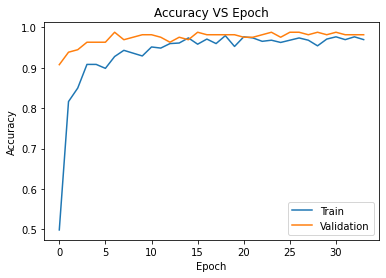

In [ ]:
plt.plot(History.history['accuracy'])
plt.plot(History.history['val_accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='lower right')
plt.show()

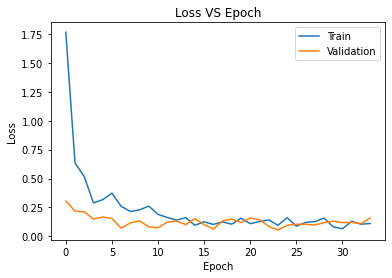

In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# VII. Testing the model

In [ ]:
Test_Data = ImageDataGenerator(rescale = 1/255).flow_from_directory(Test_Path,
                                                                    target_size = (128,128), 
                                                                    batch_size = Batch_Size_Test, 
                                                                    class_mode = 'categorical')

Found 19 images belonging to 11 classes.


In [ ]:
Test_Images,Test_Labels=next(Test_Data)
Scores= model_006.evaluate(Test_Images,Test_Labels,verbose=1)
print('Test Loss:', Scores[0])
print('Test Accuracy:', Scores[1])

19/19 [==============================] - 0s 492us/sample - loss: 1.1294e-06 - accuracy: 1.0000
Test Loss: 1.1293561783531914e-06
Test Accuracy: 1.0


# VIII. Saving the model

In [ ]:
os.chdir('/content/drive/My Drive/Transfer learning/')
model_006.save('Model 006.h5')

# IX. Saving metrics

In [ ]:
with open('history 006.pkl','wb') as PICKLE:
  pickle.dump(History.history,PICKLE)

In [ ]:
with open('Scores 006.pkl','wb') as PICKLE:
  pickle.dump(Scores,PICKLE)

# X. Results

In [ ]:
os.chdir('/content/drive/My Drive/Transfer learning/')

In [ ]:
with open('history 000.pkl','rb') as PICKLE_0:
  HISTORY_0=pickle.load(PICKLE_0)
with open('history 001.pkl','rb') as PICKLE_1:
  HISTORY_1=pickle.load(PICKLE_1)
with open('history 002.pkl','rb') as PICKLE_2:
  HISTORY_2=pickle.load(PICKLE_2)
with open('history 003.pkl','rb') as PICKLE_3:
  HISTORY_3=pickle.load(PICKLE_3)

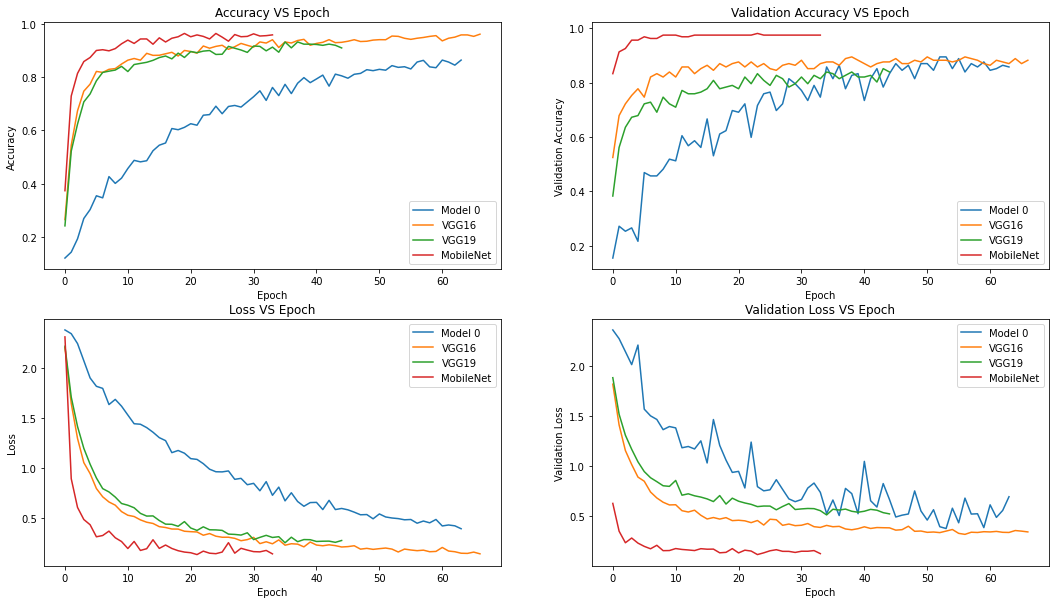

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.plot(HISTORY_0['accuracy'])
plt.plot(HISTORY_1['accuracy'])
plt.plot(HISTORY_2['accuracy'])
plt.plot(HISTORY_3['accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(HISTORY_0['val_accuracy'])
plt.plot(HISTORY_1['val_accuracy'])
plt.plot(HISTORY_2['val_accuracy'])
plt.plot(HISTORY_3['val_accuracy'])
plt.title('Validation Accuracy VS Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='lower right')
plt.subplot(2,2,3)
plt.plot(HISTORY_0['loss'])
plt.plot(HISTORY_1['loss'])
plt.plot(HISTORY_2['loss'])
plt.plot(HISTORY_3['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='upper right')
plt.subplot(2,2,4)
plt.plot(HISTORY_0['val_loss'])
plt.plot(HISTORY_1['val_loss'])
plt.plot(HISTORY_2['val_loss'])
plt.plot(HISTORY_3['val_loss'])
plt.title('Validation Loss VS Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='upper right')
plt.show()

In [ ]:
with open('history 004.pkl','rb') as PICKLE_4:
  HISTORY_4=pickle.load(PICKLE_4)
with open('history 005.pkl','rb') as PICKLE_5:
  HISTORY_5=pickle.load(PICKLE_5)
with open('history 006.pkl','rb') as PICKLE_6:
  HISTORY_6=pickle.load(PICKLE_6)
with open('history 007.pkl','rb') as PICKLE_7:
  HISTORY_7=pickle.load(PICKLE_7)
with open('history 008.pkl','rb') as PICKLE_8:
  HISTORY_8=pickle.load(PICKLE_8)
with open('history 009.pkl','rb') as PICKLE_9:
  HISTORY_9=pickle.load(PICKLE_9)

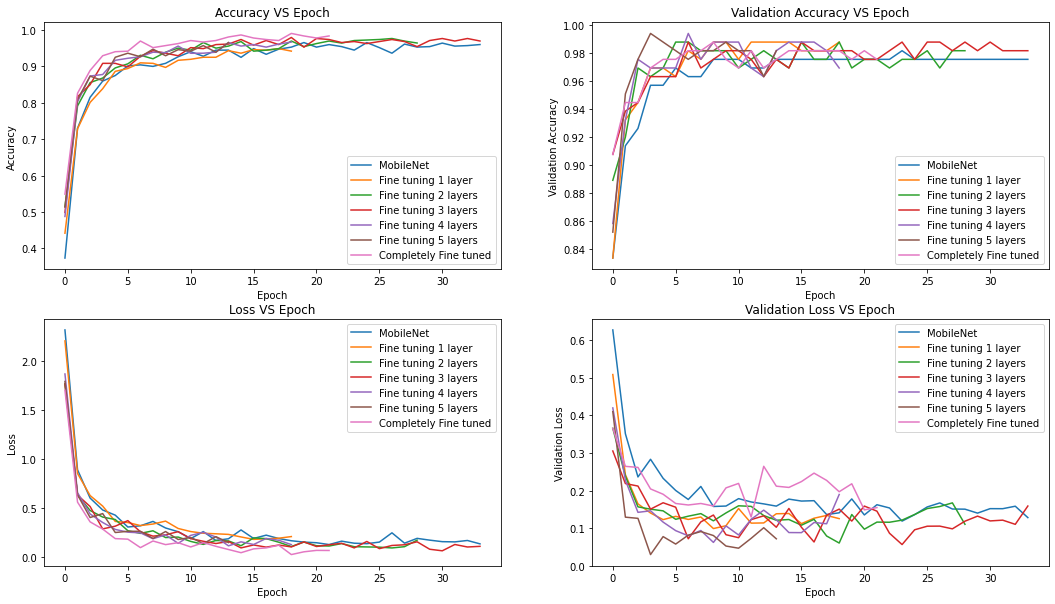

In [ ]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
plt.plot(HISTORY_3['accuracy'])
plt.plot(HISTORY_4['accuracy'])
plt.plot(HISTORY_5['accuracy'])
plt.plot(HISTORY_6['accuracy'])
plt.plot(HISTORY_7['accuracy'])
plt.plot(HISTORY_8['accuracy'])
plt.plot(HISTORY_9['accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(HISTORY_3['val_accuracy'])
plt.plot(HISTORY_4['val_accuracy'])
plt.plot(HISTORY_5['val_accuracy'])
plt.plot(HISTORY_6['val_accuracy'])
plt.plot(HISTORY_7['val_accuracy'])
plt.plot(HISTORY_8['val_accuracy'])
plt.plot(HISTORY_9['val_accuracy'])
plt.title('Validation Accuracy VS Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='lower right')
plt.subplot(2,2,3)
plt.plot(HISTORY_3['loss'])
plt.plot(HISTORY_4['loss'])
plt.plot(HISTORY_5['loss'])
plt.plot(HISTORY_6['loss'])
plt.plot(HISTORY_7['loss'])
plt.plot(HISTORY_8['loss'])
plt.plot(HISTORY_9['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.subplot(2,2,4)
plt.plot(HISTORY_3['val_loss'])
plt.plot(HISTORY_4['val_loss'])
plt.plot(HISTORY_5['val_loss'])
plt.plot(HISTORY_6['val_loss'])
plt.plot(HISTORY_7['val_loss'])
plt.plot(HISTORY_8['val_loss'])
plt.plot(HISTORY_9['val_loss'])
plt.title('Validation Loss VS Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

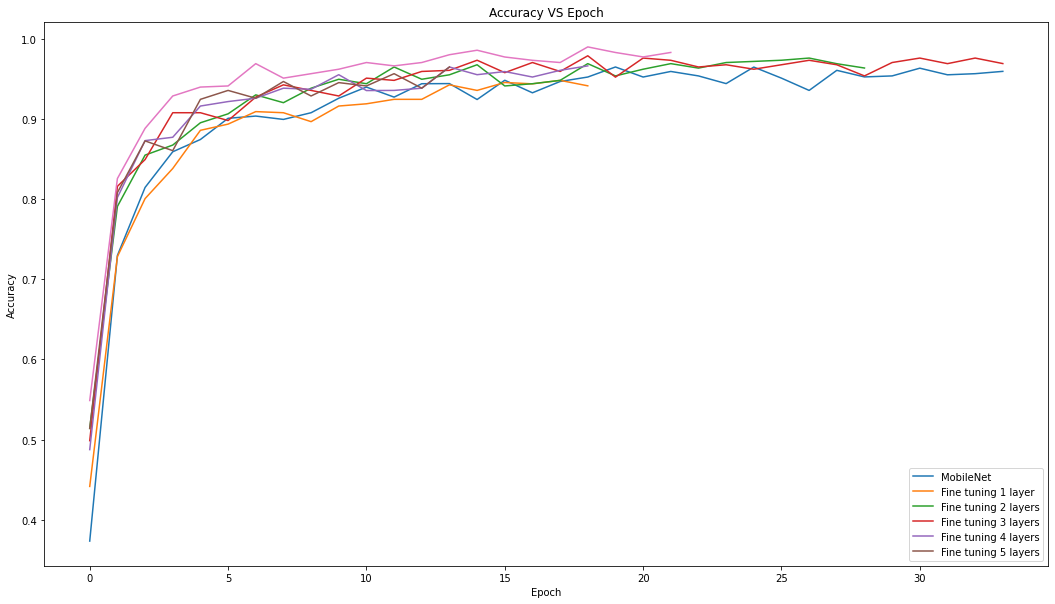

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['accuracy'])
plt.plot(HISTORY_4['accuracy'])
plt.plot(HISTORY_5['accuracy'])
plt.plot(HISTORY_6['accuracy'])
plt.plot(HISTORY_7['accuracy'])
plt.plot(HISTORY_8['accuracy'])
plt.plot(HISTORY_9['accuracy'])
plt.title('Accuracy VS Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers'], loc='lower right')
plt.show()

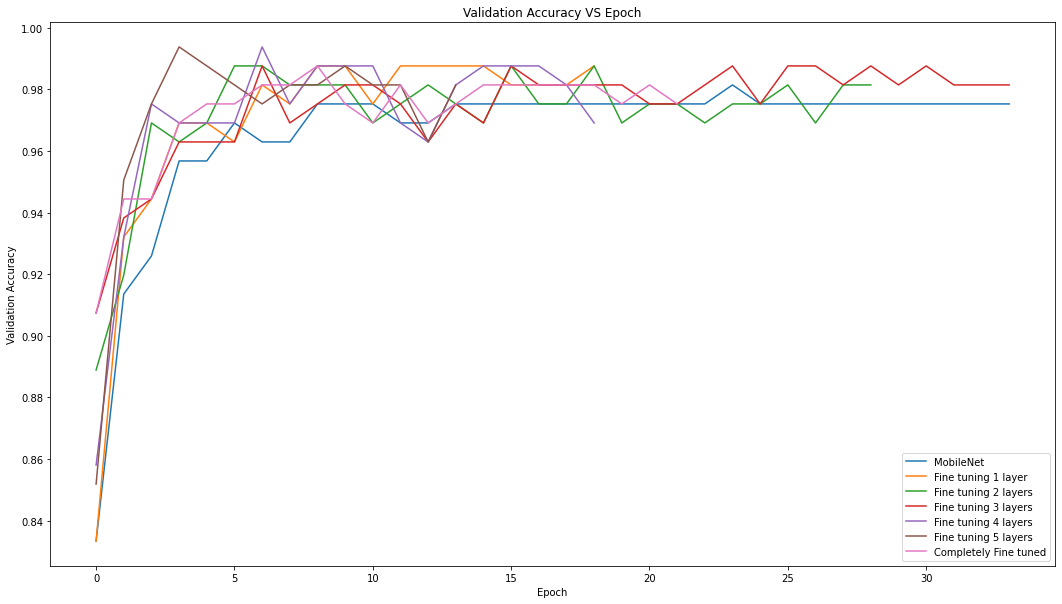

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['val_accuracy'])
plt.plot(HISTORY_4['val_accuracy'])
plt.plot(HISTORY_5['val_accuracy'])
plt.plot(HISTORY_6['val_accuracy'])
plt.plot(HISTORY_7['val_accuracy'])
plt.plot(HISTORY_8['val_accuracy'])
plt.plot(HISTORY_9['val_accuracy'])
plt.title('Validation Accuracy VS Epoch')
plt.ylabel('Validation Accuracy')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='lower right')
plt.show()

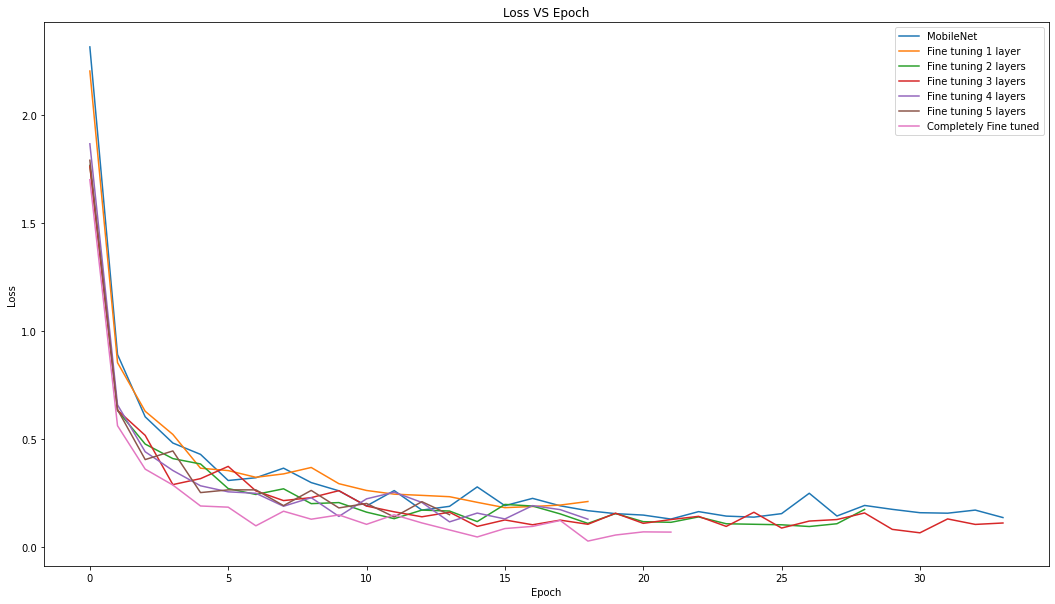

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['loss'])
plt.plot(HISTORY_4['loss'])
plt.plot(HISTORY_5['loss'])
plt.plot(HISTORY_6['loss'])
plt.plot(HISTORY_7['loss'])
plt.plot(HISTORY_8['loss'])
plt.plot(HISTORY_9['loss'])
plt.title('Loss VS Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

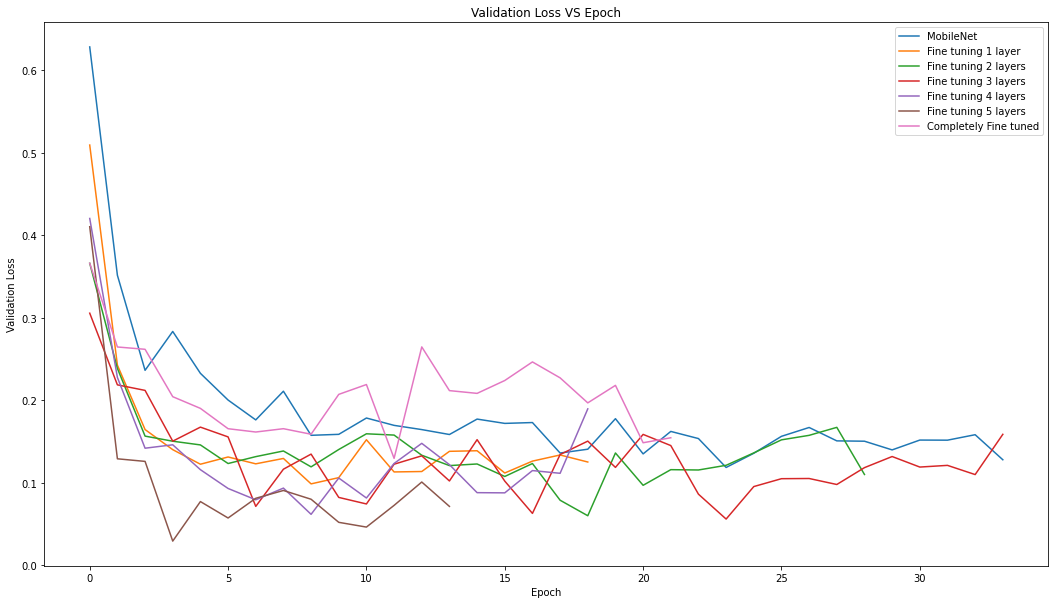

In [ ]:
plt.figure(figsize=(18,10))
plt.plot(HISTORY_3['val_loss'])
plt.plot(HISTORY_4['val_loss'])
plt.plot(HISTORY_5['val_loss'])
plt.plot(HISTORY_6['val_loss'])
plt.plot(HISTORY_7['val_loss'])
plt.plot(HISTORY_8['val_loss'])
plt.plot(HISTORY_9['val_loss'])
plt.title('Validation Loss VS Epoch')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

In [ ]:
with open('Scores 000.pkl','rb') as PICKLE_0:
  SCORES_0=pickle.load(PICKLE_0)
with open('Scores 001.pkl','rb') as PICKLE_1:
  SCORES_1=pickle.load(PICKLE_1)
with open('Scores 002.pkl','rb') as PICKLE_2:
  SCORES_2=pickle.load(PICKLE_2)
with open('Scores 003.pkl','rb') as PICKLE_3:
  SCORES_3=pickle.load(PICKLE_3)
with open('Scores 004.pkl','rb') as PICKLE_4:
  SCORES_4=pickle.load(PICKLE_4)
with open('Scores 005.pkl','rb') as PICKLE_5:
  SCORES_5=pickle.load(PICKLE_5)
with open('Scores 006.pkl','rb') as PICKLE_6:
  SCORES_6=pickle.load(PICKLE_6)
with open('Scores 007.pkl','rb') as PICKLE_7:
  SCORES_7=pickle.load(PICKLE_7)
with open('Scores 008.pkl','rb') as PICKLE_8:
  SCORES_8=pickle.load(PICKLE_8)
with open('Scores 009.pkl','rb') as PICKLE_9:
  SCORES_9=pickle.load(PICKLE_9)

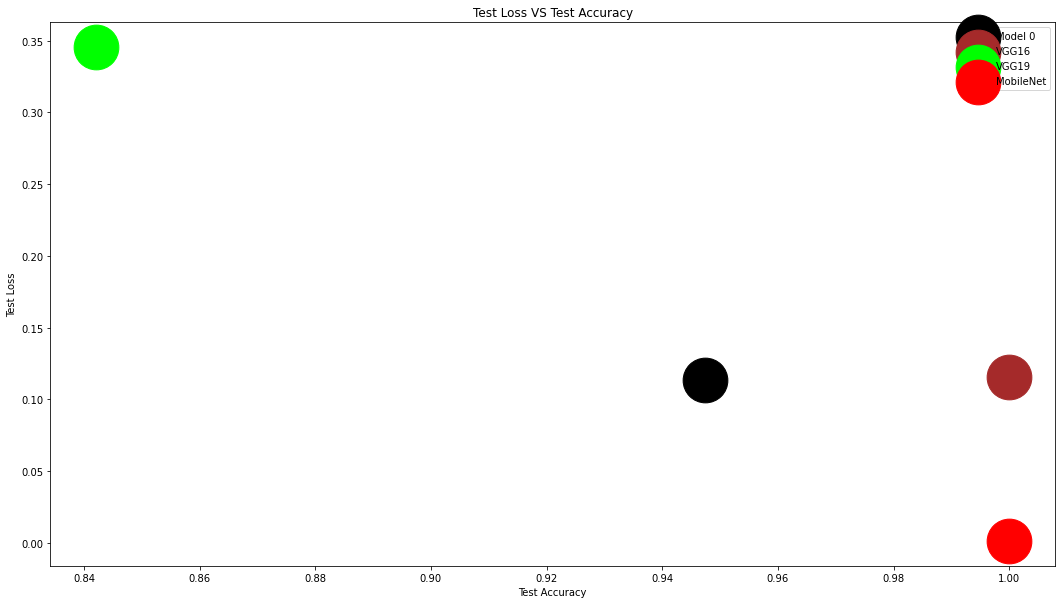

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_0[1],SCORES_0[0],s=2000,color='black')
plt.scatter(SCORES_1[1],SCORES_1[0],s=2000,color='brown')
plt.scatter(SCORES_2[1],SCORES_2[0],s=2000,color='lime')
plt.scatter(SCORES_3[1],SCORES_3[0],s=2000,color='red')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['Model 0', 'VGG16','VGG19','MobileNet'], loc='upper right')
plt.show()

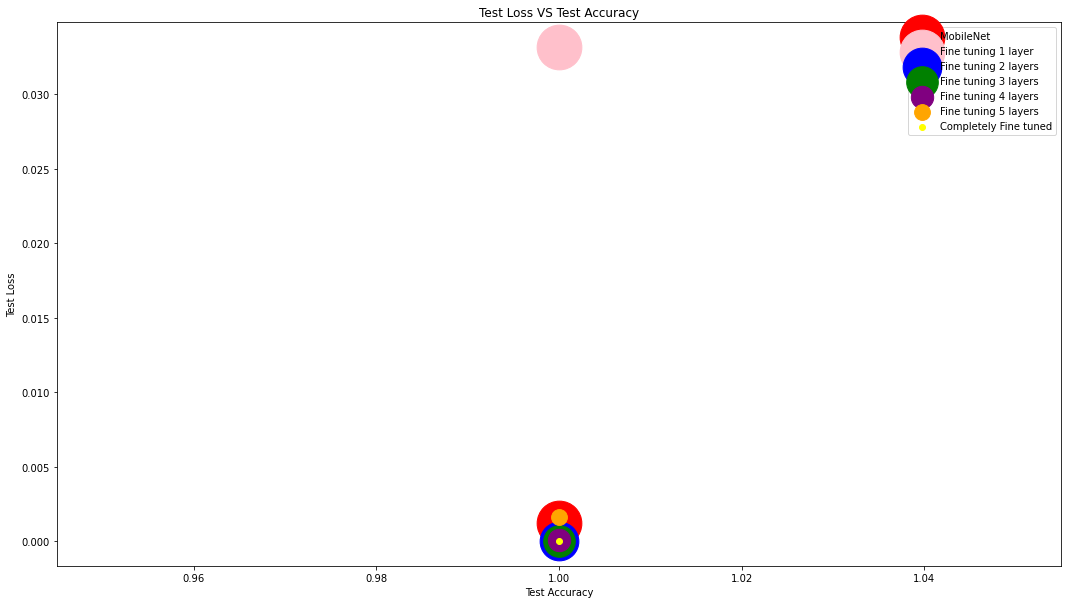

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_3[1],SCORES_3[0],s=2000,color='red')
plt.scatter(SCORES_4[1],SCORES_4[0],s=2000,color='pink')
plt.scatter(SCORES_5[1],SCORES_5[0],s=1500,color='blue')
plt.scatter(SCORES_6[1],SCORES_6[0],s=1000,color='green')
plt.scatter(SCORES_7[1],SCORES_7[0],s=500,color='purple')
plt.scatter(SCORES_8[1],SCORES_8[0],s=250,color='orange')
plt.scatter(SCORES_9[1],SCORES_9[0],color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['MobileNet','Fine tuning 1 layer','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

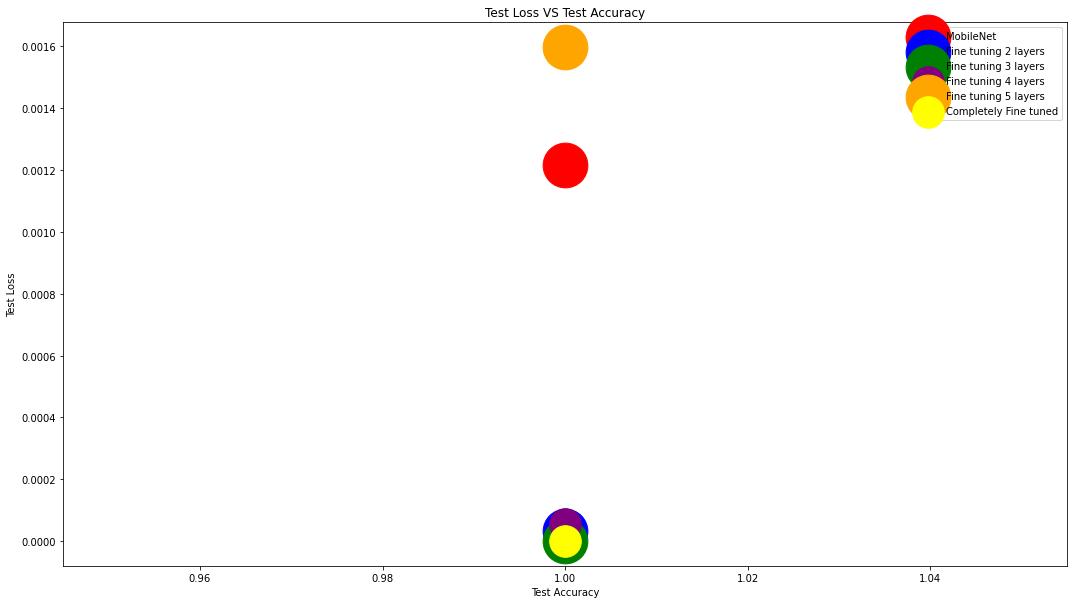

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_3[1],SCORES_3[0],s=2000,color='red')
plt.scatter(SCORES_5[1],SCORES_5[0],s=2000,color='blue')
plt.scatter(SCORES_6[1],SCORES_6[0],s=2000,color='green')
plt.scatter(SCORES_7[1],SCORES_7[0],s=1000,color='purple')
plt.scatter(SCORES_8[1],SCORES_8[0],s=2000,color='orange')
plt.scatter(SCORES_9[1],SCORES_9[0],s=1000,color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['MobileNet','Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Fine tuning 5 layers','Completely Fine tuned'], loc='upper right')
plt.show()

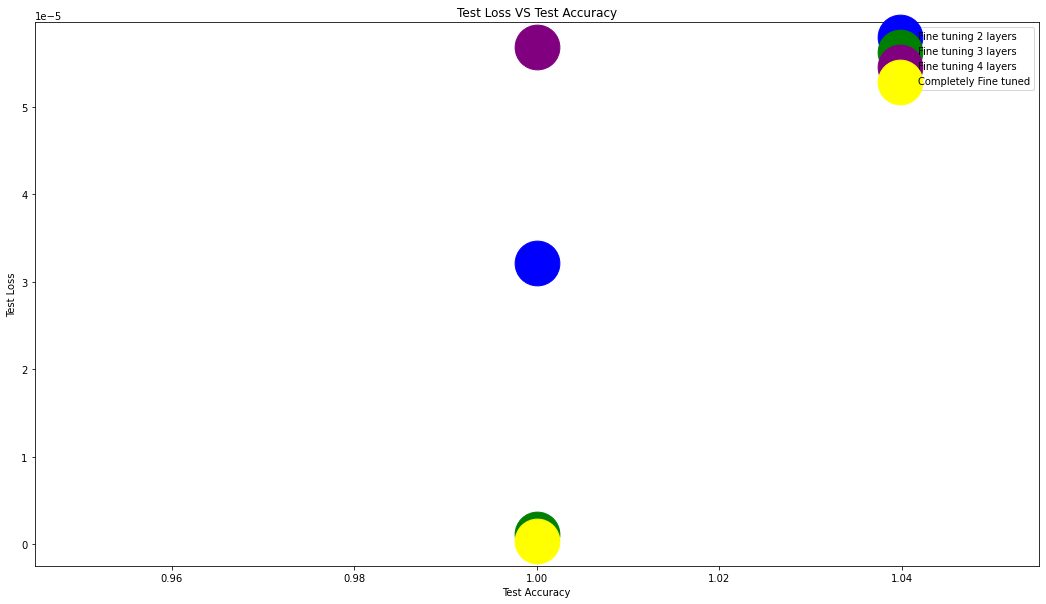

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_5[1],SCORES_5[0],s=2000,color='blue')
plt.scatter(SCORES_6[1],SCORES_6[0],s=2000,color='green')
plt.scatter(SCORES_7[1],SCORES_7[0],s=2000,color='purple')
plt.scatter(SCORES_9[1],SCORES_9[0],s=2000,color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['Fine tuning 2 layers','Fine tuning 3 layers','Fine tuning 4 layers','Completely Fine tuned'], loc='upper right')
plt.show()

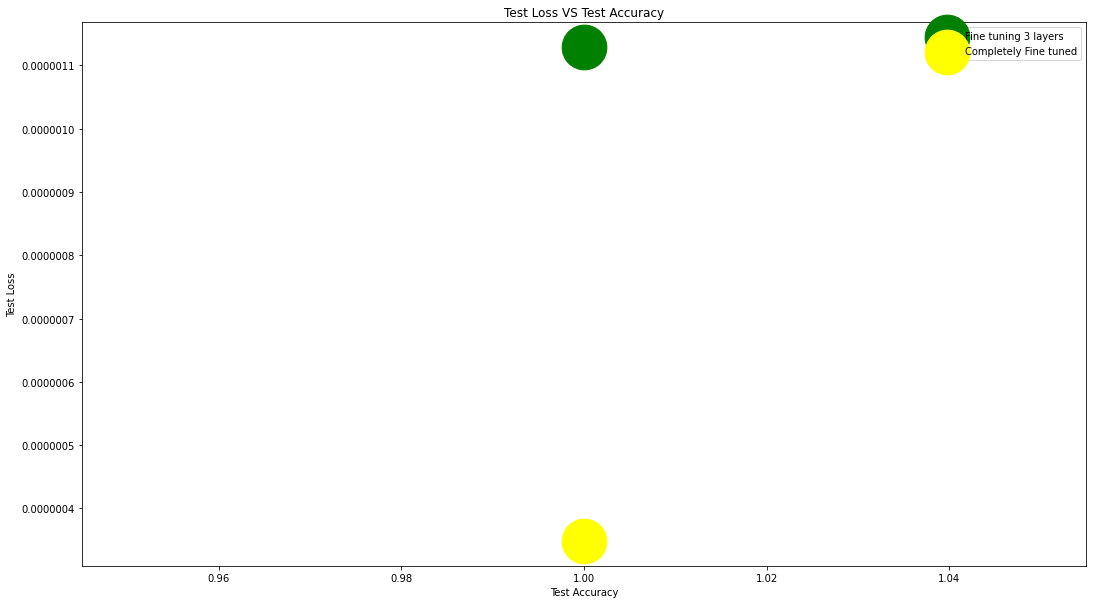

In [ ]:
plt.figure(figsize=(18,10))
plt.scatter(SCORES_6[1],SCORES_6[0],s=2000,color='green')
plt.scatter(SCORES_9[1],SCORES_9[0],s=2000,color='yellow')
plt.title('Test Loss VS Test Accuracy')
plt.ylabel('Test Loss')
plt.xlabel('Test Accuracy')
plt.legend(['Fine tuning 3 layers','Completely Fine tuned'], loc='upper right')
plt.ticklabel_format(style='plain')#For better understanding of: 1e-6 on y-axis
plt.show()